# RECOMMENDATION SYSTEMS


### What are recommendation systems/engines?
It is a type of information filtering systems that filters the data using different algorithms to improve the quality of search results (recommendations) by providing items that are most relevant items to users based on the item serached or are related to the search history of the user.


### How does a traditional heurestic for recommendations work ?
If we have to think of how to recommend items to the user -
* we may recommend items based on the most popular search among all the users,
or
* we may divide the users into multiple segments based on their preferences (user features) and recommend items to them based on the segment they belong to.

But, these methods have the following flaws associated with them:-
* In the first case, the most popular items would be the same for each user => everyone sees same recommendations.
* In the second case, with the increase in number of users the number of features will also increase => classifying the users into various segments will be a very difficult task

What is requires is the personalized recommendatations.



## How does a personalized recommendation system works?

#### Data Set Preparation
It is necessary to obtain product ratings (explicit data) entered by the user and implicit user's data from available data streams like search history, clicks, order history, etc.


####  Filtering The Data
Once the data is collected and stored properly, we have to filter out irrelevant information from it to make the final prediction. It can be done through any of the following algorithms.



## MOVIE RECOMMENDATION SYSTEM

Task - Recommend movies to the user by training the model on tbdb dataset

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
credits = pd.read_csv("D:/C-Drive Project's Datasets/tmdb-5000-movie-dataset/tmdb_5000_credits.csv")
movies = pd.read_csv("D:/C-Drive Project's Datasets/tmdb-5000-movie-dataset/tmdb_5000_movies.csv")

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [5]:
credits.columns = ['id', 'title', 'cast', 'crew']

In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
movies = movies.merge(credits, on='id')

In [9]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [10]:
movies.shape

(4803, 23)

In [11]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_x                  object
vote_average            float64
vote_count                int64
title_y                  object
cast                     object
crew                     object
dtype: object


### 1. Demographic Filtering
They offer generalized recommendations to every user, based on item's popularity and/or genre. The System recommends the same items to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that items that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.


#### Strategy
* Decide a score metric to score or rate movie
* Calculate score for every movie.
* Sort the scores and recommend the best rated movie to the users


STEP 1

For rating movies we can use "voting_average" as a metric, but, averaging them out may bring high rating to low like 8.9 rating and only 3 votes can not consider better than 7.8 as avg rating for 40 votes. 
Thus using IMDB's weighted rating which is :


WR = (v/(v+m) * R) + (m/(v+m) * C)

where,
* v -> vote_count, the number of votes for the movie
* m -> the minimum votes required to be listed in the chart (90th percentile) = movies['vote_count'].quantile(0.9) 
* R -> vote_average, is the average rating of the movie, and
* C -> the mean vote across the whole report = movies['vote_average'].mean


In [12]:
m = movies['vote_count'].quantile(0.9)
C = movies['vote_average'].mean()

In [13]:
def imbd_weighted_ratings(movies, m=m, C=C):
    v =movies["vote_count"]
    R =movies["vote_average"]
    left_term = v /(v + m)
    right_term = m /(v + m) 
    return left_term* R + right_term* C

Assumption - To qualify the popularity charts we require atleast 90th percentile of user vote

In [14]:
qualified_movies  = movies.copy().loc[movies["vote_count"] >= m]

In [15]:
qualified_movies.shape

(481, 23)

In [16]:
# qualified_movies.head()

STEP 2

Calculate score for every movie.

In [17]:
qualified_movies["imdb_score"] = qualified_movies.apply(imbd_weighted_ratings, axis = 1)

In [18]:
qualified_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,imdb_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696


STEP 3 

Sort the movies based on metric score (imdb_score)


In [19]:
qualified_movies.sort_values("imdb_score", ascending=False, inplace= True)

In [20]:
filtered_qualified_movies = qualified_movies[['title_y', 'popularity', 'vote_count','vote_average', "imdb_score"]]

In [21]:
filtered_qualified_movies.head()

,title_y,popularity,vote_count,vote_average,imdb_score
1881,The Shawshank Redemption,136.747729,8205,8.5,8.059258
662,Fight Club,146.757391,9413,8.3,7.939256
65,The Dark Knight,187.322927,12002,8.2,7.920020
3232,Pulp Fiction,121.463076,8428,8.3,7.904645
96,Inception,167.583710,13752,8.1,7.863239


In [22]:
def get_recommendations(k):
    return filtered_qualified_movies[:k]['title_y']

Recommending top-n movies (n=5)

In [23]:
get_recommendations(5)

1881    The Shawshank Redemption
662                   Fight Club
65               The Dark Knight
3232                Pulp Fiction
96                     Inception
Name: title_y, dtype: object

Visualizaing top 50 datapoints 

In [24]:
popular = movies.sort_values('popularity', ascending=False)

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.bar(popular['title_y'].head(50),popular['popularity'].head(50))
plt.xlabel("Popularity")
plt.xticks(rotation = 90)
plt.title("Popular Movies")

Text(0.5,1,'Popular Movies')

Text(0.5,1,'Popular Movies')

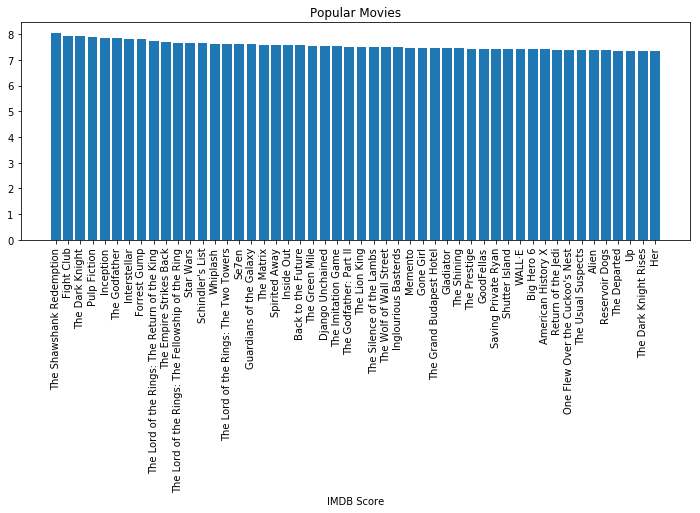

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.bar(qualified_movies['title_y'].head(50),qualified_movies['imdb_score'].head(50))
plt.xlabel("IMDB Score")
plt.xticks(rotation = 90)
plt.title("Popular Movies")

##### PROBLEM WITH DEMOGRAPHIC FILTERING - 
The most popular items would be the same for each user => everyone sees same recommendations.

### 2. Content Based Filtering

It recommends the user items that the user himself has previously liked. Eg, someone likes "Person Of Interest" series then the user will be recommended series from alike genre/plot. 

Two types of vectors are maintained by the recommendation system:
* Profile Vector - A vector containing the past behavior of the user,  i.e. the movies liked/disliked by the user and the ratings given by them. 
* Item Vector - Item vector contains the details of each item, say for movie it will store genre, cast, director, etc.

It then finds the Cosine Similarity, i.e., the cosine of the angle between the profile vector and the item vector.

This value ranges between -1 to 1.  Based on cosine distance items are arranges in descening order.

Other substitutes of Cosine Similarity:
* TOP-N APPROACH: top 10 movies are recommended.

* RATING SCALE APPROACH: A thershold is set and all items above that threshold are recommended.

* EUCLIDEAN DISTANCE: Similar items lie in close proximity to each other, this calculating euclidean distance between items and based on distance, items can be recommended.

* PEARSON'S CORRELATION: It talks in terms of correllation. Higher the correlation, more the similarity. 

E = summation here


m = mean


V = square root





SIM(u,v) = [ E( R(ui) - m(R(u)) )*(R(vi) - m(R(v))] /  [V E(R(ui) - m(R(u)) ) ^2 * V E(R(vi) - m(R(v)) ) ^2]



##### In this movie dataset overview gives the description of each movie, hence describing the plot of the movie.

#### Movie Description Based Recommender

In [27]:
movies["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [28]:
movies.overview.iloc[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [29]:
movies.overview.isnull().sum()

3

In [30]:
movies.overview = movies.overview.fillna("")

Since it is stream of texts we need to apply text processing (NLP)
* TF-IDF: (term instances/total instances)* log(number of documents/documents with term)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [32]:
tfidf_matrix = tfidf.fit_transform(movies['overview'])
tfidf_matrix.shape

(4803, 20978)

At this point we have a matrix which represents a word (column) in the overview volabulary and the row has each movie. Doing so reduces the importance of words that occur frequently in the plot overviews/final similarity score




##### Cosine Similarity (A,B) 

= cos (theta)

= (A.B)/|A||B|

=[ E (A(i) B(i))]/ [ V(E A(i)^2) *  V(E B(i)^2)]

where,

E = summation here

&

V = square root


#### NOTE-
Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [33]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [34]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index=movies['title_y']).drop_duplicates()

In [35]:
def get_recommendations(title, k):
    index = indices[title]
    
    similarity = list(enumerate(cosine_sim[index]))
    
    similarity = sorted(similarity, key=lambda x: x[1], reverse=True)
    similarity = similarity[1:k]
    
    movie_indices = [i[0] for i in similarity]
    
    return movies['title_y'].iloc[movie_indices]

In [36]:
get_recommendations('X-Men', 10)

134     Mission: Impossible - Rogue Nation
342                           Men in Black
1089                           The Phantom
101                     X-Men: First Class
203                                     X2
1894                                   War
590                              The Siege
33                   X-Men: The Last Stand
122               X-Men Origins: Wolverine
Name: title_y, dtype: object

#### Metadata Based Recommender

Quality of a recommender is highly dependent on the metadata that it uses. Here we will build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [37]:
credits = pd.read_csv("D:/C-Drive Project's Datasets/tmdb-5000-movie-dataset/tmdb_5000_credits.csv")
movies = pd.read_csv("D:/C-Drive Project's Datasets/tmdb-5000-movie-dataset/tmdb_5000_movies.csv")

In [38]:
credits.columns = ['id', 'title', 'cast', 'crew']

In [39]:
movies = movies.merge(credits, on='id')

In [40]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [41]:
features = ['cast', 'crew', 'keywords', 'genres']

In [42]:
movies[['cast', 'crew', 'keywords', 'genres']]

,cast,crew,keywords,genres
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
5,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...","[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na..."
6,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...","[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...","[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751..."
7,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
8,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de...","[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
9,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [43]:
# The above feature data is in the form of strings. We need to convert it into object for further use.
from ast import literal_eval
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

In [44]:
movies[features][:5]

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [45]:
movies.crew[0][0]

{'credit_id': '52fe48009251416c750aca23',
 'department': 'Editing',
 'gender': 0,
 'id': 1721,
 'job': 'Editor',
 'name': 'Stephen E. Rivkin'}

In [46]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [47]:
movies = movies.dropna()

In [48]:
movies.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_x                 0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
dtype: int64

In [49]:
# the column crew has json file format after turning it into object
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [50]:
movies['director'] = movies['crew'].apply(get_director)

In [51]:
movies.director[:5]

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4       Andrew Stanton
Name: director, dtype: object

In [52]:
# returns list of top 3 elements from the json file
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names

In [53]:
features = ['cast', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [54]:
movies[features][:5]

,cast,keywords,genres
0,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,"[Christian Bale, Michael Caine, Gary Oldman]","[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [55]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [56]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

In [57]:
movies[features].head(5)

,cast,keywords,director,genres
0,"[samworthington, zoesaldana, sigourneyweaver]","[cultureclash, future, spacewar]",jamescameron,"[action, adventure, fantasy]"
1,"[johnnydepp, orlandobloom, keiraknightley]","[ocean, drugabuse, exoticisland]",goreverbinski,"[adventure, fantasy, action]"
2,"[danielcraig, christophwaltz, léaseydoux]","[spy, basedonnovel, secretagent]",sammendes,"[action, adventure, crime]"
3,"[christianbale, michaelcaine, garyoldman]","[dccomics, crimefighter, terrorist]",christophernolan,"[action, crime, drama]"
4,"[taylorkitsch, lynncollins, samanthamorton]","[basedonnovel, mars, medallion]",andrewstanton,"[action, adventure, sciencefiction]"


In [58]:
# Creating collection of metadata as string which is to be fed to the vectorizer
def metadata_collection(x):
#     colec = " "
    return  ' '.join (x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
movies['metadata_collection'] = movies.apply(metadata_collection, axis=1)

In [59]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,metadata_collection
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...


In [60]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['metadata_collection'])

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [62]:
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title_y'])

In [63]:
movies.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,metadata_collection
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...


In [64]:
def get_recommendations(title, k):
    index = indices[title]
    
    similarity = list(enumerate(cosine_sim[index]))
    
    similarity = sorted(similarity, key=lambda x: x[1], reverse=True)
    similarity = similarity[1:k]
    
    movie_indices = [i[0] for i in similarity]
    
    return movies['title_y'].iloc[movie_indices]

In [69]:
get_recommendations("The Godfather", 5)

453            The Godfather: Part III
679                     Apocalypse Now
561            The Talented Mr. Ripley
334    Wall Street: Money Never Sleeps
Name: title_y, dtype: object


##### PROBLEM WITH CONTENT BASED FILTERING - 
For case 1 - Confined to recommend items that are of same types. It will never recommend products which the user has not bought or liked in the past. It narrows down the flexibility of the system.


For the second case, with the increase in number of users the number of features will also increase => classifying the users into various segments will be a very difficult task


Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who s/he is.

###  3. Collaborative Filtering
This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts. 

##### Example - 
If person A likes 3 movies, say Interstellar, Inception and Predestination, and person B likes Inception, Predestination and The Prestige, then they have almost similar interests. We can say with some certainty that A should like The Prestige and B should like Interstellar. 

The collaborative filtering algorithm uses “User Behavior” for recommending items. This is one of the most commonly used algorithms in the industry as it is not dependent on any additional information. 



The collaborative filtering can be modeled in any of the following ways:-

#### User-User collaborative filtering
It finds similarity scores between users to pick the most similar users and  recommends products which these similar users have liked or bought previously.

For movies, this algorithm finds the similarity between each user based on the ratings they have previously given to different movies. The prediction of an item for a user u is calculated by computing the weighted sum of the user ratings given by other users to an item i.
Thus the prediction for user 'u' is given as:

P(u,i) = E [r(v,i) * s(u,v)] / E [S(u,v)]

where,
* Pu,i is the prediction of an item
* Rv,i is the rating given by a user v to a movie i
* Su,v is the similarity between users

Basic steps for this-
* For predictions we need the similarity between the user u and v. We can make use of Pearson correlation.
* First we find the items rated by both the users and based on the ratings, correlation between the users is calculated.
* The predictions can be calculated using the similarity values. This algorithm, first of all calculates the similarity between each user and then based on each similarity calculates the predictions. Users having higher correlation will tend to be similar.


Disadvantage-
This algorithm is quite time consuming as it involves calculating the similarity for each user and then calculating prediction for each similarity score. One way of handling this problem is to select only a few users (neighbors) instead of all to make predictions, i.e. instead of making predictions for all similarity values, we choose only few similarity values. There are various ways to select the neighbors:

* Select a threshold similarity and choose all the users above that value
* Randomly select the users
* Arrange the neighbors in descending order of their similarity value and choose top-N users
* Use clustering for choosing neighbors



This algorithm is useful when the number of users is less. Its not effective when there are a large number of users as it will take a lot of time to compute the similarity between all user pairs. This leads us to item-item collaborative filtering, which is effective when the number of users is more than the items being recommended.


#### Item-Item collaborative filtering
Similarity is found between each items. Thus for movies similarities between movies is found and based on that recommendations of similar movies are made for the user. 

This algorithm works similar to user-user collaborative filtering with just a little change – instead of taking the weighted sum of ratings of “user-neighbors”, we take the weighted sum of ratings of “item-neighbors”.

##### What will happen if a new user or a new item is added in the dataset? 
It is called a Cold Start. 

* Visitor Cold Start
Visitor Cold Start means that a new user is introduced in the dataset. Since there is no history of that user, the system does not know the preferences of that user. It becomes harder to recommend products to that user. So, how can we solve this problem? One basic approach could be to apply a popularity based strategy, i.e. recommend the most popular products. These can be determined by what has been popular recently overall or regionally. Once we know the preferences of the user, recommending products will be easier.

*  Product Cold Start
Product Cold Start means that a new product is launched in the market or added to the system. User action is most important to determine the value of any product. More the interaction a product receives, the easier it is for our model to recommend that product to the right user. We can make use of Content based filtering to solve this problem. The system first uses the content of the new product for recommendations and then eventually the user actions on that product.

Instead of implementing collaborative filtering from scratch we will use the Surprise library that used extremely powerful algorithms like Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations.

In [72]:
from surprise import Reader, Dataset, SVD, evaluate
reader = Reader()

ratings = pd.read_csv("D:/C-Drive Project's Datasets/the-movies-dataset/ratings_small.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [73]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

In [74]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

C:\Users\bpakh\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Users\bpakh\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8972
MAE:  0.6882
------------
Fold 2
RMSE: 0.8935
MAE:  0.6887
------------
Fold 3
RMSE: 0.9005
MAE:  0.6933
------------
Fold 4
RMSE: 0.8993
MAE:  0.6935
------------
Fold 5
RMSE: 0.8936
MAE:  0.6866
------------
------------
Mean RMSE: 0.8968
Mean MAE : 0.6901
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.8972373557378001,
                             0.8934828810568436,
                             0.9005147657759248,
                             0.8992820705358987,
                             0.8935877597828717],
                            'mae': [0.6881752016544322,
                             0.6886802671434908,
                             0.6933090506891842,
                             0.6935298481504008,
                             0.6866445480575235]})

In [75]:
trainset = data.build_full_trainset()
svd.train(trainset)

C:\Users\bpakh\Anaconda3\lib\site-packages\surprise\prediction_algorithms\algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


In [76]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [80]:
svd.predict(5, 654, 3)

Prediction(uid=5, iid=654, r_ui=3, est=3.829736124067553, details={'was_impossible': False})

 For movies id = 654 we got estimated prediction of 3.83.
 
This recommender system doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

#### Conclusion
We create recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, Hybrid Systems can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary. This model was very baseline and only provides a fundamental framework to start with.

References:
* https://www.kaggle.com/rounakbanik/movie-recommender-systems
* https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/#
        